<a href="https://colab.research.google.com/github/juancapeto/Modulo-RH/blob/main/Modulo_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carga De Datos y Limpieza**



In [1]:
#IMPORTAR PAQUETES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Cargar bases de datos 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#CARGAR BASE DE DATOS
general=pd.read_csv("/content/drive/MyDrive/ANALÍTICA III/Aplicaciones en RH/general_data.csv",sep=";")
employee=pd.read_csv("/content/drive/MyDrive/ANALÍTICA III/Aplicaciones en RH/employee_survey_data.csv",sep=",")
manager=pd.read_csv("/content/drive/MyDrive/ANALÍTICA III/Aplicaciones en RH/manager_survey_data.csv",sep=",")
retirement=pd.read_csv("/content/drive/MyDrive/ANALÍTICA III/Aplicaciones en RH/retirement_info.csv",sep=";")
in_time=pd.read_csv("/content/drive/MyDrive/ANALÍTICA III/Aplicaciones en RH/in_time.csv",sep=",")
out_time=pd.read_csv("/content/drive/MyDrive/ANALÍTICA III/Aplicaciones en RH/out_time.csv",sep=",")

In [3]:
#NULOS BASES DE DATOS
general.isnull().sum()  #INFORMACION GENERAL

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [4]:
employee.isnull().sum()   #SATISFACION LABORAL

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [5]:
manager.isnull().sum()    #DESEMPEÑO   NO HAY

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

In [6]:
retirement.isnull().sum()  #RETIROS

EmployeeID            0
Attrition             0
retirementDate        0
retirementType        0
resignationReason    70
dtype: int64

In [7]:
                          #TRATAMIENTO NULOS RETIROS

retirement=retirement.fillna({'resignationReason':'Others' }) #SE REEMPLAZAN LOS NULO POR CATEGORIA OTHERS

In [8]:
retirement['resignationReason'].unique() #VERIFICO

array(['Others', 'Stress', 'Salary'], dtype=object)

In [9]:
                          #SE CONCATENAN LAS BASES DE DATOS 
df1=pd.merge(general, employee, on='EmployeeID')

df2=pd.merge(df1, manager, on='EmployeeID')

df=pd.merge(df2, retirement, on='EmployeeID', how='left')


In [10]:
                              # DESPUES DE CONCATENAR SE OBTIENE UN SOLO DATAFRAME

df.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition', 'retirementDate',
       'retirementType', 'resignationReason'],
      dtype='object')

In [11]:
                                # Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeCount            4410 non-null   int64  
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

In [12]:
                                #CONVERTIR A CATEGORICAS

df=df.astype({'Education':object,'WorkLifeBalance':object,'retirementType':object,'EnvironmentSatisfaction':object,'JobInvolvement':object
            ,'JobSatisfaction':object , 'PerformanceRating':object})

In [13]:
                                    # Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   object 
 5   EducationField           4410 non-null   object 
 6   EmployeeCount            4410 non-null   int64  
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

In [14]:
                        #NULOS EN EL DATAFRAME
df.isnull().sum()

Age                           0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeID                    0
Gender                        0
JobLevel                      0
JobRole                       0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked           19
Over18                        0
PercentSalaryHike             0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             9
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
EnvironmentSatisfaction      25
JobSatisfaction              20
WorkLifeBalance              38
JobInvolvement                0
PerformanceRating             0
Attrition                  3699
retirementDate             3699
retirementType             3699
resignat

In [15]:
                                  # ESTADISTICA
df.describe()

,Age,DistanceFromHome,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [16]:
                            #Variables cualitativas
df.describe(include = 'object')

,BusinessTravel,Department,Education,EducationField,Gender,JobRole,MaritalStatus,Over18,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason
count,4410,4410,4410,4410,4410,4410,4410,4410,4385.0,4390.0,4372.0,4410,4410,711,711,711,711
unique,3,3,5,6,2,9,3,1,4.0,4.0,4.0,4,2,1,308,2,3
top,Travel_Rarely,Research & Development,3,Life Sciences,Male,Sales Executive,Married,Y,3.0,4.0,3.0,3,3,Yes,14/07/2016,Resignation,Others
freq,3129,2883,1716,1818,2646,978,2019,4410,1350.0,1367.0,2660.0,2604,3732,711,6,641,393


In [17]:
df["resignationReason"].unique()  #RAZONES RETIRO

array([nan, 'Others', 'Stress', 'Salary'], dtype=object)

In [18]:
                        #TRATAMIENTO DE VALORES NULOS

df = df.fillna({'NumCompaniesWorked': 2})    # LOS VALORES NULOS DEL NUMERO DE EMPRESAS EN LAS CUALES HA TRABAJADO, EL 50% DE LOS EMPLEADOS HA TRABAJADO EN ALMENOS 2 POR LO QUE SE REEMPLAZAN LOS NULOS POR ESTE VALOR
df = df.fillna({'TotalWorkingYears': 11}) #SE CAMBIAN LOS NULOS DE ESTA COLUMNA POR LA MEDIA DE LOS AÑOS QUE HA TRABAJADO HASTA AHORA UN EMPLEADO
df = df.fillna({'EnvironmentSatisfaction': 3}) #SE CAMBIA POR EL TOP DE CALIFICACIÓN DEL EMPELADO EN LA ENCUESTA 
df = df.fillna({'JobSatisfaction': 4}) #SE CAMBIA POR EL TOP DE CALIFICACIÓN DEL EMPELADO EN LA ENCUESTA DE CALIFICACIÓN 
df = df.fillna({'WorkLifeBalance': 3}) #SE CAMBIA POR EL TOP DE CALIFICACIÓN DE LA COLUMNA DE SATISFACCIÓN 

df= df.fillna({'retirementType': 'Activo'}) #SE CAMBIA LOS NULOS DE ESTA COLUMNA POR ACTIVO, SE REFIERE A LOS QUE AUN SE ENCUENTRAN ACTIVOS
df = df.fillna({'resignationReason': 'Activo'}) #SE CAMBIA LOS NULOS DE ESTA COLUMNA POR ACTIVO PARA LOS QUE AUN SE ENCUENTRAN TRABAJANDO EN LA EMPRESA

In [19]:
                              #ELIMINAR COLUMNAS

df=df.drop(['Attrition'],axis=1) # SE ELIMINA ATTRICTION PUES NO SE VE INFORMACIÓN RELEVANTE QUE EXTRAER DE ESTA COLUMNA PUES TODOS SUS REGISTROS SON 'YES'
df=df.drop(['EmployeeCount'],axis=1) #SE ELIMINA ESTA COLUMNA YA QUE CONTIENE PARA TODOS LOS EMPLEADOS EL MISMO DATO DE 1.0
df=df.drop(['StandardHours'],axis=1) #SE ELIMINA ESTA COLUMNA YA QUE CONTIENE PARA TODOS LOS EMPLEADOS EL MISMO HORARIO DE TRABAJO DE 8 HORAS
df=df.drop(["retirementDate"],axis=1) #SE ELIMINA COLUMNA FECHA DE RETIRO
df=df.drop(["Over18"],axis=1) #SE ELIMINA COLUMNA Over18

In [20]:
                    #Ver cuantos nulos quedaron
df.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
retirementType             0
resignationReason          0
dtype: int64

In [21]:
df[df.duplicated()]  #No Hay filas duplicadas

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementType,resignationReason


In [22]:
df.shape #La base de datos para analizar tiene 4410 registros y 27 columnas

(4410, 27)

In [23]:
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementType,resignationReason
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,...,1,0,0,3.0,4.0,2.0,3,3,Activo,Activo
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,...,5,1,4,3.0,2.0,4.0,2,4,Resignation,Others
2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,...,5,0,3,2.0,2.0,1.0,3,3,Activo,Activo
3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,...,8,7,5,4.0,4.0,3.0,2,3,Activo,Activo
4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,...,6,0,4,4.0,1.0,3.0,3,3,Activo,Activo


# **Análisis exploratorio**

In [24]:
df

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementType,resignationReason
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,...,1,0,0,3.0,4.0,2.0,3,3,Activo,Activo
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,...,5,1,4,3.0,2.0,4.0,2,4,Resignation,Others
2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,...,5,0,3,2.0,2.0,1.0,3,3,Activo,Activo
3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,...,8,7,5,4.0,4.0,3.0,2,3,Activo,Activo
4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,...,6,0,4,4.0,1.0,3.0,3,3,Activo,Activo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,...,3,0,2,4.0,1.0,3.0,3,3,Activo,Activo
4406,29,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,...,3,0,2,4.0,4.0,3.0,2,3,Activo,Activo
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,...,4,1,2,1.0,3.0,3.0,3,4,Activo,Activo
4408,42,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,...,9,7,8,4.0,1.0,3.0,2,3,Activo,Activo


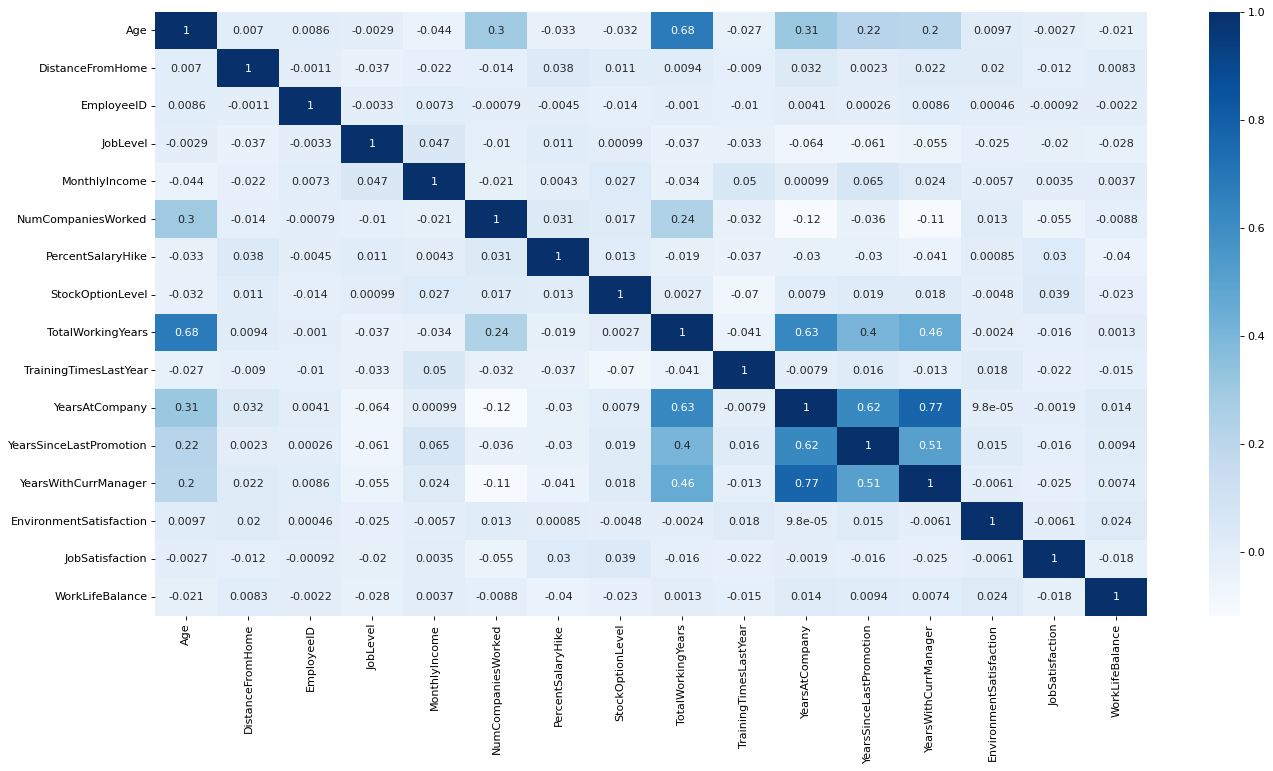

In [25]:
                                  #CORRELACION

from matplotlib import colorbar
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80);
sns.heatmap(df.corr(), annot = True, cmap='Blues'); 
#

In [26]:
# ¿CÓMO ESTÁN DISTRUIBUIDOS LAS PERSONAS QUE HAN SALIDO DE LA EMPRESA?

base = df[df['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation

# crear dataset
base= base.groupby(['retirementType'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica:
fig = px.pie(base, values = 'EmployeeID', names ='retirementType',
             title= '<b>Retiro de empleados año 2015-2016<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica:
fig.update_layout(
    xaxis_title = 'Nivel Satisfacion',
    yaxis_title = 'Total empleados',
    template = 'simple_white',
    title_x = 0.5)
fig.show()

In [27]:
#SATISFACCION EN EL TRABAJO DE LOS EMPLEADOS RETIRADOS DEL DEPARTAMENTO RESEARCH AND DEVELOPMENT

base = df[df['retirementType'].isin(['Resignation'])] # creando un dataframe unicamente con los fired y resignation

# crear dataset
base= base.groupby(['JobSatisfaction'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

dic = {1:'Low',
       2:'Medium',
       3:'High',
       4:'Very High'}

base['JobSatisfaction'] = base['JobSatisfaction'].replace(dic)
# crear gráfica:
fig = px.pie(base, values = 'EmployeeID', names ='JobSatisfaction',
             title= '<b>Satisfacción del trabajo en los empleados retirados del departamento Research and Development',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica:
fig.update_layout(
    xaxis_title = 'Nivel Satisfacion',
    yaxis_title = 'Total empleados',
    template = 'simple_white',
    title_x = 0.5)
fig.show()

In [28]:
df.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating',
       'retirementType', 'resignationReason'],
      dtype='object')

In [29]:
 #RETIRO DE EMPLEADOS X SEXO 
 import plotly.express as px
 # crear dataset
base = df[df['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con fired y resignation
base = base.groupby(['Gender', 'retirementType'])[['EmployeeID']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'Gender', y='EmployeeID', color = 'retirementType', barmode = 'group', 
             title= '<b>Retiros por sexo',
             color_discrete_sequence=px.colors.qualitative.Antique)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Sexo',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [30]:
#¿A QUE EDAD SE RETIRAN MÁS?

# crear dataset
base = df[df['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los barrio NAmes y CollgCr
base = base.groupby(['Age', 'retirementType'])[['EmployeeID']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'Age', y='EmployeeID', color = 'retirementType', barmode = 'group', 
             title= '<b>Retiros por Edad',
             color_discrete_sequence=px.colors.qualitative.Antique)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Edad',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [31]:
#¿ CUAL ES EL DEPARTAMENTO CON MAYOR RETIRO?

# crear dataset
base = df[df['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation
base = base.groupby(['Department', 'retirementType'])[['EmployeeID']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'Department', y='EmployeeID', color = 'retirementType', barmode = 'group', 
             title= '<b>Retiros por Departamento',
             color_discrete_sequence=px.colors.qualitative.Antique)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Departamento',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [32]:
#RETIROS POR CAMPO DE PROFESION

# crear dataset
base = df[df['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation
base = base.groupby(['EducationField', 'retirementType'])[['EmployeeID']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'EducationField', y='EmployeeID', color = 'retirementType', barmode = 'group', 
             title= '<b>Retiros por Campo de profesión',
             color_discrete_sequence=px.colors.qualitative.Antique)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Campo de profesion',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [33]:
#RETIROS POR AUMENTO SALARIAL

base = df[df['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation
base = base.groupby(['PercentSalaryHike', 'retirementType'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'PercentSalaryHike', y='EmployeeID', color = 'retirementType', barmode = 'group', 
             title= '<b>Retiros por Aumento Salarial',
             color_discrete_sequence=px.colors.qualitative.Antique)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Aumento Salarial',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [34]:
#RETIRO DE EMPLEADOS X NIVEL DE SATISFACION EN EL TRABAJO
base = df[df['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation

dic = {1:'Low',
       2:'Medium',
       3:'High',
       4:'Very High'}
# crear dataset
base= base.groupby(['JobSatisfaction'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()
base['JobSatisfaction'] = base['JobSatisfaction'].replace(dic)
# ExterQual: calidad del material del exterior del edificio

# crear gráfica:
fig = px.pie(base, values = 'EmployeeID', names ='JobSatisfaction',
             title= '<b>Retiro de empleados por nivel de satisfaccion en el trabajo<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica:
fig.update_layout(
    xaxis_title = 'Nivel Satisfacion',
    yaxis_title = 'Total empleados',
    template = 'simple_white',
    title_x = 0.5)
fig.show()

In [35]:
#RETIROS POR AÑOS EN LA EMPRESA
base = df[df['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation
base = base.groupby(['YearsAtCompany', 'retirementType'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'YearsAtCompany', y='EmployeeID', color = 'retirementType', barmode = 'group', 
             title= '<b>Retiros por Años en la empresa',
             color_discrete_sequence=px.colors.qualitative.Antique)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Años en la Empresa',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [36]:
#¿ POR QUE RAZON SE RETIRAN LOS EMPLEADOS?
base = df[df['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation
base = base.groupby(['resignationReason', 'retirementType'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'resignationReason', y='EmployeeID', color = 'retirementType', barmode = 'group', 
             title= '<b>Razon de retiro',
             color_discrete_sequence=px.colors.qualitative.Antique)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Razones de retiro',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [37]:
df.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating',
       'retirementType', 'resignationReason'],
      dtype='object')

In [38]:
#¿ES EL AUMENTO SALARIAL UNA DE LAS RAZONES DE RETIRO?
base = df[df['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation
base = base.groupby(['PercentSalaryHike', 'Department'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'PercentSalaryHike', y='EmployeeID', color = 'Department', barmode = 'group', 
             title= '<b>Retiros por departamento y aumento salarial',
             color_discrete_sequence=px.colors.qualitative.Antique)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Aumento Salarial',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [39]:
df.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating',
       'retirementType', 'resignationReason'],
      dtype='object')

In [40]:
#ULTIMOS AÑOS DESDE LA ULTIMA PROMOCION
ba= df[df['retirementType'].isin(['Resignation'])]
ba.groupby(['YearsSinceLastPromotion', 'retirementType'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

,YearsSinceLastPromotion,retirementType,EmployeeID
0,0,Resignation,294
1,1,Resignation,132
2,2,Resignation,76
3,7,Resignation,44
4,3,Resignation,24
5,6,Resignation,17
6,4,Resignation,14
7,9,Resignation,11
8,5,Resignation,6
9,11,Resignation,6


In [41]:
#RETIROS X SEXO DE ACUERDO AL AUMENTO SALARIAL
base = df[df['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation
base = base.groupby(['PercentSalaryHike', 'Gender'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()

# crear gráfica
fig = px.bar(base, x = 'PercentSalaryHike', y='EmployeeID', color = 'Gender', barmode = 'group', 
             title= '<b>Retiros por sexo de acuerdo al incremento salarial',
             color_discrete_sequence=px.colors.qualitative.Antique)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = '% Aumento Salarial',
    yaxis_title = 'Total retiros',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [42]:
base = df[df['retirementType'].isin(['Fired','Resignation'])] # creando un dataframe unicamente con los fired y resignation
base = base.groupby(['PercentSalaryHike', 'Department'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index()
base

,PercentSalaryHike,Department,EmployeeID
0,13,Research & Development,63
1,11,Research & Development,57
2,12,Research & Development,54
3,14,Research & Development,54
4,15,Research & Development,42
5,17,Research & Development,36
6,13,Sales,36
7,14,Sales,27
8,19,Research & Development,24
9,18,Sales,24


# **Analisis de modelo con todas las variables**

In [43]:
df.shape

(4410, 27)

In [44]:
#CREAR DATAFRAME SOLO CON ACTIVOS Y RETIRADOS
                                  #NO INTERESAN LOS DESPIDOS

df= df[df['retirementType'].isin(['Activo','Resignation'])]

df.shape

(4340, 27)

In [45]:
df["retirementType"].unique()

array(['Activo', 'Resignation'], dtype=object)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4340 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4340 non-null   int64  
 1   BusinessTravel           4340 non-null   object 
 2   Department               4340 non-null   object 
 3   DistanceFromHome         4340 non-null   int64  
 4   Education                4340 non-null   object 
 5   EducationField           4340 non-null   object 
 6   EmployeeID               4340 non-null   int64  
 7   Gender                   4340 non-null   object 
 8   JobLevel                 4340 non-null   int64  
 9   JobRole                  4340 non-null   object 
 10  MaritalStatus            4340 non-null   object 
 11  MonthlyIncome            4340 non-null   int64  
 12  NumCompaniesWorked       4340 non-null   float64
 13  PercentSalaryHike        4340 non-null   int64  
 14  StockOptionLevel        

 MODELOS DE CLASIFICACIÓN

Modelos: LINEAR SVC - KNEIGHBORS CLASSIFIER - DECISION TREE CLASSIFICATION-RANDOM FOREST 


In [ ]:
#ESCALAR VARIABLES NUMERICAS
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['Age']] = scaler.fit_transform(df[['Age']])
df[['DistanceFromHome']] = scaler.fit_transform(df[['DistanceFromHome']])
#df[['Education']] = scaler.fit_transform(df[['Education']])
#df[['JobLevel']] = scaler.fit_transform(df[['JobLevel']])
df[['MonthlyIncome']] = scaler.fit_transform(df[['MonthlyIncome']])
df[['NumCompaniesWorked']] = scaler.fit_transform(df[['NumCompaniesWorked']])
df[['PercentSalaryHike']] = scaler.fit_transform(df[['PercentSalaryHike']] )                                                           
df[['StockOptionLevel']] = scaler.fit_transform(df[['StockOptionLevel']])
df[['TotalWorkingYears']] = scaler.fit_transform(df[['TotalWorkingYears']])
df[['TrainingTimesLastYear']] = scaler.fit_transform(df[['TrainingTimesLastYear']])
df[['YearsAtCompany']] = scaler.fit_transform(df[['YearsAtCompany']])
df[['YearsSinceLastPromotion']] = scaler.fit_transform(df[['YearsSinceLastPromotion']])
df[['YearsWithCurrManager']] = scaler.fit_transform(df[['YearsWithCurrManager']])

#df[['EnvironmentSatisfaction']] = scaler.fit_transform(df[['EnvironmentSatisfaction']])
#df[['JobSatisfaction']] = scaler.fit_transform(df[['JobSatisfaction']])
#df[['WorkLifeBalance']] = scaler.fit_transform(df[['WorkLifeBalance']])
#df[['JobInvolvement']] = scaler.fit_transform(df[['JobInvolvement']])
#df[['PerformanceRating']] = scaler.fit_transform(df[['PerformanceRating']])

In [ ]:
#CONVERTIR VARIABLES CATEGORICAS A DUMMIES

from sklearn.preprocessing import LabelEncoder     #Manejo de variables categoricas

le = LabelEncoder()

df['BusinessTravel'] = le.fit_transform(df.BusinessTravel)
df['Department'] = le.fit_transform(df.Department	)
df['EducationField'] = le.fit_transform(df.EducationField)
df['Gender'] = le.fit_transform(df.Gender)
df['JobRole'] = le.fit_transform(df.JobRole)
df['resignationReason'] = le.fit_transform(df.resignationReason)
df['MaritalStatus'] = le.fit_transform(df.MaritalStatus)
df['retirementType'] = le.fit_transform(df.retirementType)
df['EnvironmentSatisfaction'] = le.fit_transform(df.EnvironmentSatisfaction)
df['JobSatisfaction'] = le.fit_transform(df.JobSatisfaction)
df['WorkLifeBalance'] = le.fit_transform(df.WorkLifeBalance)
df['JobInvolvement'] = le.fit_transform(df.JobInvolvement)
df['PerformanceRating'] = le.fit_transform(df.PerformanceRating)
df['Education'] = le.fit_transform(df.Education)
df['JobLevel'] = le.fit_transform(df.JobLevel)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4340 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4340 non-null   float64
 1   BusinessTravel           4340 non-null   int64  
 2   Department               4340 non-null   int64  
 3   DistanceFromHome         4340 non-null   float64
 4   Education                4340 non-null   int64  
 5   EducationField           4340 non-null   int64  
 6   EmployeeID               4340 non-null   int64  
 7   Gender                   4340 non-null   int64  
 8   JobLevel                 4340 non-null   int64  
 9   JobRole                  4340 non-null   int64  
 10  MaritalStatus            4340 non-null   int64  
 11  MonthlyIncome            4340 non-null   float64
 12  NumCompaniesWorked       4340 non-null   float64
 13  PercentSalaryHike        4340 non-null   float64
 14  StockOptionLevel        

In [50]:
df.head()  #VERIFICO

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementType,resignationReason
0,0.785714,2,2,0.178571,1,1,1,0,0,0,...,0.025,0.000000,0.000000,2,3,1,2,0,0,0
1,0.309524,1,1,0.321429,0,1,2,0,0,6,...,0.125,0.066667,0.235294,2,1,3,1,1,1,1
2,0.333333,1,1,0.571429,3,4,3,1,3,7,...,0.125,0.000000,0.176471,1,1,0,2,0,0,0
3,0.476190,0,1,0.035714,4,1,4,1,2,1,...,0.200,0.466667,0.294118,3,3,2,1,0,0,0
4,0.333333,2,1,0.321429,0,3,5,1,0,7,...,0.150,0.000000,0.235294,3,0,2,2,0,0,0


In [51]:
#SE ORGANIZA EL DATAFRAME DEJANDO LA TARGET AL FINAL
        #SE ELIMINA COLUMNA RAZON RETIRO
df=df[[ 'EmployeeID','Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'retirementType']]
df.head()

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementType
0,1,0.785714,2,2,0.178571,1,1,0,0,0,...,1.000000,0.025,0.000000,0.000000,2,3,1,2,0,0
1,2,0.309524,1,1,0.321429,0,1,0,0,6,...,0.500000,0.125,0.066667,0.235294,2,1,3,1,1,1
2,3,0.333333,1,1,0.571429,3,4,1,3,7,...,0.333333,0.125,0.000000,0.176471,1,1,0,2,0,0
3,4,0.476190,0,1,0.035714,4,1,1,2,1,...,0.833333,0.200,0.466667,0.294118,3,3,2,1,0,0
4,5,0.333333,2,1,0.321429,0,3,1,0,7,...,0.333333,0.150,0.000000,0.235294,3,0,2,2,0,0


In [52]:
df.shape

(4340, 26)

In [53]:
         #ARREGLO 

arre = df.values
X = arre[:,1:25] #variables
y = arre[:,25] #target
#y=y.astype('int')

In [54]:
y

array([0., 1., 0., ..., 0., 0., 0.])

In [55]:
                                                    #MODELO K NEIGHBORS
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 7

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
#modelo
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
knn1=knn.score(X_test, y_test)

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.85


In [56]:
                                                      #MODELO DECISION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Create Decision Tree classifer object
DTC = DecisionTreeClassifier()
# Train Decision Tree Classifer
DTC.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DTC.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
DTC1=metrics.accuracy_score(y_test,y_pred)

Accuracy: 0.966973886328725


In [57]:
                                              #MODELO SVC

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

#Import svm model
from sklearn import svm

#Create a svm Classifier
SVC= svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVC.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVC.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
SVC1=metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.8448540706605223


In [60]:
                                          #MODELO RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
#Creamos un forrest para nuestro modelo
RF = RandomForestClassifier(n_estimators=10)
#Entrenamos nuestro bosque
RF = RF.fit(X,y)

#Realizamos predicciones y evaluamos el modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(RF, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy:', (n_scores.mean()))
RF1=n_scores.mean()


Accuracy: 0.9897849462365592


In [ ]:
#ACCURACY DE LOS MODELOS CON TODAS LAS VARIABLES

# KNN:0.88  SVC:0.84 DTC:0.97 RF:0.98

# **Presentación de Avance 2: Diseño de la solución, selección de variables, comparación y selección de algoritmos**


In [61]:
df.groupby(['retirementType'])[['EmployeeID']].count().reset_index()   #ACTIVOS:0  RETIROS:1

,retirementType,EmployeeID
0,0,3699
1,1,641


SELECCION DE VARIABLES: Se procede a identificar las variables de mayor peso para delimitar el modelo 

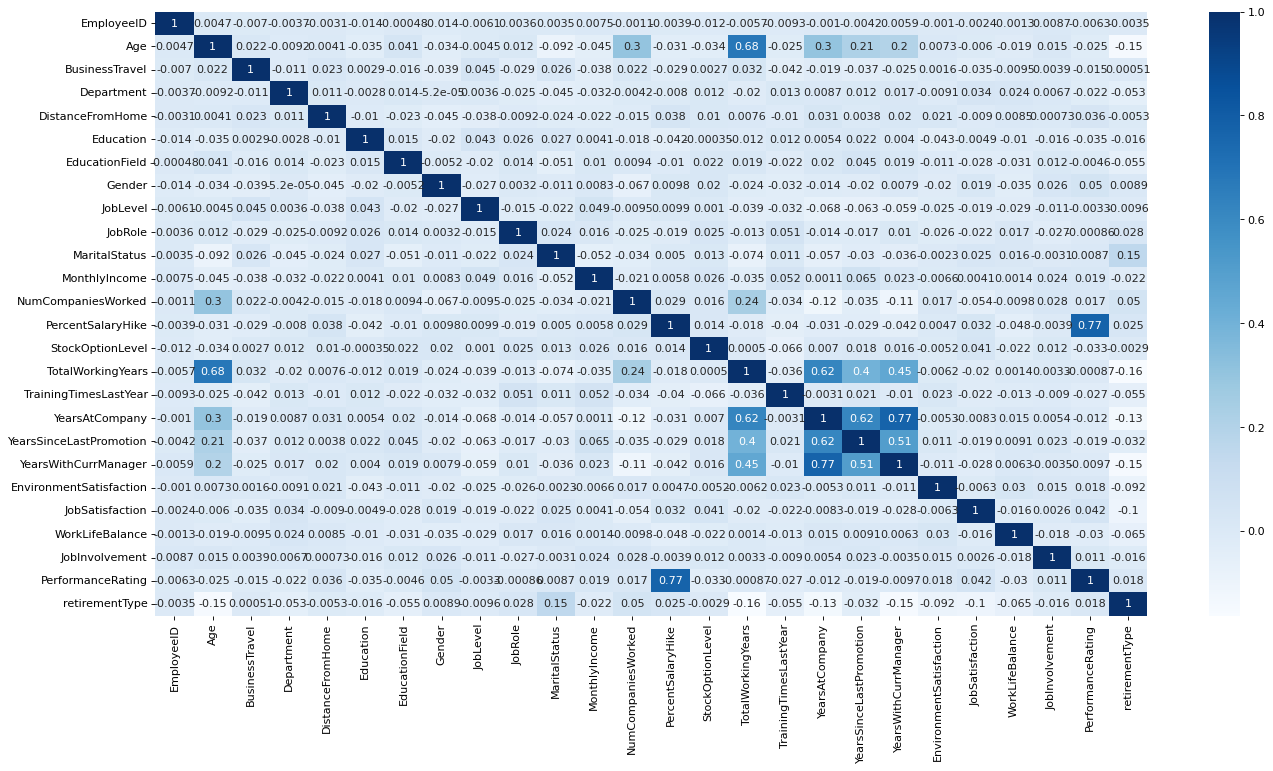

In [ ]:
        #CORRELACION 
from matplotlib import colorbar
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80);
sns.heatmap(df.corr(), annot = True, cmap='Blues'); 

#AGE #MARITALSTATUS #YEARSATCOMPANY #JOBSATISFATION 

In [ ]:
df.columns

Index(['EmployeeID', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating',
       'retirementType'],
      dtype='object')

In [62]:
         #ARREGLO 

arre = df.values
X = arre[:,1:25] #variables
y = arre[:,25] #target
#y=y.astype('int')

In [63]:
#LIBRERIAS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
                                        #METODOS DE SELECCION DE VARIABLES

# METODO SELECTKBEST

prueba = SelectKBest(score_func=f_classif, k=12)
fit = prueba.fit(X,y)
#print('Features Seleccionados Kbest: ',fit.scores_)
import numpy as np
print("Selection Kbest: ", np.where(prueba.get_support()))

# METODO RECURSIVE FEATURE (RFE)

modelo = LogisticRegression(solver='liblinear')
rfe = RFE(modelo, n_features_to_select=12)
fit = rfe.fit(X,y)


print('Features Seleccionados RECURSIVE FEATURE: ', fit.support_)


# METODO FEATURE IMPORTANCE(FI)

modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)
print('Features Seleccionados FEATURE IMPORTANCE: ',modelo.feature_importances_*100)

Selection Kbest:  (array([ 0,  2,  5,  9, 11, 14, 15, 16, 18, 19, 20, 21]),)
Features Seleccionados RECURSIVE FEATURE:  [ True False  True False False False False False False  True  True  True
 False False  True  True False  True  True  True  True  True False False]
Features Seleccionados FEATURE IMPORTANCE:  [6.00852645 3.30555538 3.31787697 4.71921376 3.85906395 3.78700438
 2.63346069 3.99078541 4.44704509 4.67899051 4.65827761 4.37663133
 4.41011439 3.82438088 5.47407103 3.78956782 5.4325389  4.14274268
 4.57300376 4.47940551 4.50068504 4.05517673 3.86143291 1.67444883]


In [ ]:
#MEJORES FEATURES DE ACUERDO A CADA METODO

#KBEST    0,  2,  5,  9, 11, 14, 15, 16, 18, 19, 20, 21

#RFE      1 3 10 11 12 15 16 18 19

#FI       1 4 6 9 10 11 12 13 15 17

In [ ]:
#A PARTIR DE LOS FEATURES ANTERIORES, SE GENERA UNA NUEVA BASE CON LAS VARIABLES DE INTERES
df.columns

Index(['EmployeeID', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating',
       'retirementType'],
      dtype='object')

In [65]:
#BASE DATOS CON FEATURES SELECCIONADAS

df1=df[['Age','Department','MaritalStatus','JobSatisfaction', 'YearsSinceLastPromotion','TotalWorkingYears','YearsWithCurrManager','YearsAtCompany', 
        'retirementType']]

df1.head()

,Age,Department,MaritalStatus,JobSatisfaction,YearsSinceLastPromotion,TotalWorkingYears,YearsWithCurrManager,YearsAtCompany,retirementType
0,0.785714,2,1,3,0.000000,0.025,0.000000,0.025,0
1,0.309524,1,2,1,0.066667,0.150,0.235294,0.125,1
2,0.333333,1,1,1,0.000000,0.125,0.176471,0.125,0
3,0.476190,1,1,3,0.466667,0.325,0.294118,0.200,0
4,0.333333,1,2,0,0.000000,0.225,0.235294,0.150,0


In [ ]:
df1.shape

(4340, 9)

In [ ]:
df1.columns

Index(['Age', 'Department', 'MaritalStatus', 'JobSatisfaction',
       'YearsSinceLastPromotion', 'TotalWorkingYears', 'YearsWithCurrManager',
       'YearsAtCompany', 'retirementType'],
      dtype='object')

# ***MODELOS: SVC, KNN, DTC,RF***

In [66]:
df1.shape

(4340, 9)

In [67]:
#ARREGLO
arre = df1.values
X = arre[:,0:8] #variables
y = arre[:,8] #target
#y=y.astype('int')

In [68]:
y

array([0., 1., 0., ..., 0., 0., 0.])

In [69]:
                                    #MODELO LINEAR SVC

#MODELO SVC

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

#Import svm model
from sklearn import svm

#Create a svm Classifier
modelsvc = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
modelsvc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = modelsvc.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
SVC2=metrics.accuracy_score(y_test, y_pred)




Accuracy: 0.8448540706605223


In [70]:
                                      #MODELO K NEIGHBORS
  #MODELO KNEIGHBOR
  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 7

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
modelknn = KNeighborsClassifier(n_neighbors)
modelknn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(modelknn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(modelknn.score(X_test, y_test)))
knn2=modelknn.score(X_test, y_test)

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.85


In [71]:
                                              #MODELO DECISION TREE CLASIFICATION
#MODELO DECISION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Create Decision Tree classifer object
modelDTC = DecisionTreeClassifier()

# Train Decision Tree Classifer
modelDTC.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = modelDTC.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
DTC2=metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.9723502304147466


In [72]:
                                          #MODELO RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
#Creamos un forrest para nuestro modelo
modelRF = RandomForestClassifier(n_estimators=10)
#Entrenamos nuestro bosque
modelRF = modelRF.fit(X,y)

#Realizamos predicciones y evaluamos el modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(modelRF, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy:', (n_scores.mean()))
RF2=n_scores.mean()

Accuracy: 0.9863287250384026


In [ ]:
#SVC:0.84  KNN:0.88 DTC:0.97  RF:0.98

In [73]:
#ACCURACY
print("Accuracy KNN todas las variables:" ,knn1)
print("Accuracy SVC todas las variables:" ,SVC1)
print("Accuracy DTC todas las variables:" ,DTC1)
print("Accuracy RF todas las variables:" ,RF1)
print("Accuracy KNN con las variables significativas:" ,knn2)
print("Accuracy SVC con las variables significativas:" ,SVC2)
print("Accuracy DTC con las variables significativas:" ,DTC2)
print("Accuracy RF con las variables siginificativas:" ,RF2)

Accuracy KNN todas las variables: 0.8525345622119815
Accuracy SVC todas las variables: 0.8448540706605223
Accuracy DTC todas las variables: 0.966973886328725
Accuracy RF todas las variables: 0.9897849462365592
Accuracy KNN con las variables significativas: 0.8497695852534562
Accuracy SVC con las variables significativas: 0.8448540706605223
Accuracy DTC con las variables significativas: 0.9723502304147466
Accuracy RF con las variables siginificativas: 0.9863287250384026


EL ACCURACY SE CALCULA COMO LA CANTIDAD DE ACIERTOS SOBRE EL TOTAL DE RESGISTROS, ASI QUE LOS DOS MEJORES MODELO FUERON EL DTC Y RF, YA QUE TUVIERON EL ACCURACY MÁS ALTO, SIENDO EL DE RF DE 0.98 Y DTC 0.97. POR LO TANTO EL MEJOR MODELO VIENE SIENDO EL RANDOM FOREST

# **Evaluación de desempeño**

Para evaluar el desempeño del modelo se usaran 3 metodos para partir los datos de prueba y entrenamiento, y se les medira su presicion.


*   Train and Test Sets
*   Repeated Random Test-Train Splits
*   K-Fold Cross-Validation

POR FACIL ENTENDIMIENTO, SE APLICA EL PRIMER METODO


***MODELO KNN***

In [74]:
            #TRAIN AND TEST SETS   

#Separar conjuntos de entrenamiento y pruebas
pPruebas = 0.33
semilla = 3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=pPruebas, random_state=semilla)

#Entrenar
modelknn.fit(X_train, y_train)

#Pruebas
resultado = modelknn.score(X_test, y_test)

#Score-puntaje
print("Precisión: ",resultado)

Precisión:  0.8576413119330076


***MODELO SVC***

In [75]:
   #TRAIN AND TEST SETS   

#Separar conjuntos de entrenamiento y pruebas
pPruebas = 0.33
semilla = 3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=pPruebas, random_state=semilla)

#KNN
#Entrenar
modelsvc.fit(X_train, y_train)

#Pruebas
resultado = modelsvc.score(X_test, y_test)

#Score-puntaje
print("Precisión: ",resultado)

Precisión:  0.8471737613398465


***MODELO DECISION TREE***

In [76]:
     #TRAIN AND TEST SETS   
#Separar conjuntos de entrenamiento y pruebas
pPruebas = 0.33
semilla = 3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=pPruebas, random_state=semilla)

#KNN
#Entrenar
modelDTC.fit(X_train, y_train)

#Pruebas
resultado = modelDTC.score(X_test, y_test)

#Score-puntaje
print("Precisión: ",resultado)

Precisión:  0.9665038381018841


**MODELO RANDOM FOREST**

In [77]:
#TRAIN AND TEST SETS  

#Separar conjuntos de entrenamiento y pruebas
pPruebas = 0.33
semilla = 3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=pPruebas, random_state=semilla)

#KNN
#Entrenar
modelRF.fit(X_train, y_train)

#Pruebas
resultado = modelRF.score(X_test, y_test)

#Score-puntaje
print("Precisión: ",resultado)

Precisión:  0.9595254710397767


In [ ]:
#PRECISIONES DE LOS MODELOS

# KNN:0.85  SVC:0.84 DTC:0.966  RF:0.959

EL MEJOR DESEMPEÑO LO OBTUVO EL MODELO DECISION TREE CON UN 0.966, PERO NO MUY DIFERENTE AL RANDOM FOREST CON 95.9. ESTOS DOS MODELOS VIENEN SIENDO LOS MEJORES

# **Evaluación de precisión**

Para medir el desempeño del modelo, se aplicaran diferentes metodologias de evaluacion para modelos de clasificacion. Inicialmene el modelo se plantea como una regresion logistica.**

Las metodologias para evaluar el desempeño de la clasificacion son:
* Classification Accuracy
* Logistic Loss
* Area Under ROC Curve
* Confusion Matrix
* Classification Report 

<function matplotlib.pyplot.show(close=None, block=None)>

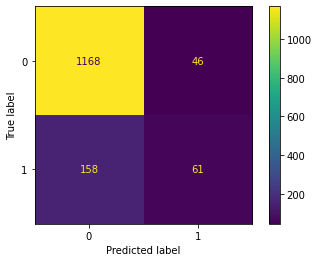

In [78]:
                          #CONFUSION MATRIX  MODELO knn
                          
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix



predicted = modelknn.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
display = ConfusionMatrixDisplay( confusion_matrix = matrix)
display.plot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

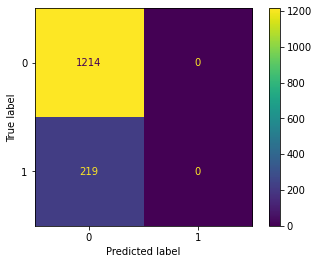

In [79]:
                          #CONFUSION MATRIX  MODELO SVC
                          
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix



predicted = modelsvc.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
display = ConfusionMatrixDisplay( confusion_matrix = matrix)
display.plot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

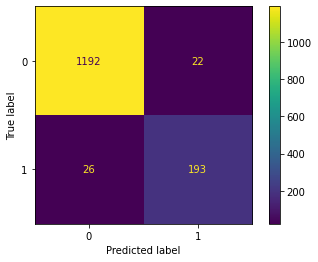

In [80]:
                          #CONFUSION MATRIX  MODELO DTC
                          
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

#0 ACTIVOS
#1 RETIROS

predicted = modelDTC.predict(X_test)
matrix1 = confusion_matrix(y_test, predicted)
display1 = ConfusionMatrixDisplay( confusion_matrix = matrix1)
display1.plot()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

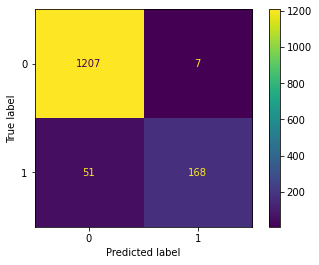

In [81]:
                 #CONFUSION MATRIX  MODELO RANDOM FOREST
                          
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

#0 ACTIVOS
#1 RETIROS

predicted = modelRF.predict(X_test)
matrix1 = confusion_matrix(y_test, predicted)
display = ConfusionMatrixDisplay( confusion_matrix = matrix1)
display.plot()
plt.show


In [ ]:
        #CLASIFICATION ACCURACY
score = 'accuracy'
resultado = cross_val_score(modelDTC,X,y,cv=kfold,scoring=score)
print("Accuracy DECISION TREE: ",resultado.mean()*100)

resultado = cross_val_score(modelsvc,X,y,cv=kfold,scoring=score)
print("Accuracy SVC: ",resultado.mean()*100)

resultado = cross_val_score(modelknn,X,y,cv=kfold,scoring=score)
print("Accuracy KNN: ",resultado.mean()*100)

resultado = cross_val_score(modelRF,X,y,cv=kfold,scoring=score)
print("Accuracy RF: ",resultado.mean()*100)

Accuracy DECISION TREE:  99.56236786469344
Accuracy SVC:  85.22410147991543
Accuracy KNN:  88.06606765327695
Accuracy RF:  99.0338266384778


EL MODELO RANDOM FOREST Y DECISION TREE OBTUVIERON LOS MAYORES PUNTAJES EN ACCURACY, RESPECTIVAMENTE DE 0.98 Y 0.97, LO CUAL SIGNIFICA QUE LAS PREDICCIONES ESTAN ACERTANDO BIEN, PERO NO ES DE CONFIAR. AHORA ANALIZANDO LA PRECISION, SE LOGRA VER QUE LA PRECISION DEL RANDOM FOREST (0.95) Y EL DECISION TREE (0.96). LO CUAL SIGNIFICA QUE EL DECISION TREE ESTÁ PREDICIENDO DE MEJOR MANERA QUE EL RANDOM FOREST. ASÍ QUE SE ELIGE EL DECISION TREE COMO MODELO A TRABAJAR.

# ***Presentación de Avance 3: Diseño de la solución, afinamiento de hiperparámetro y análisis del modelo.***

In [ ]:
#SE REALIZA EL AFINAMIENTO DE HIPERPARAMETRO PARA MEJORAR DESEMPEÑO DEL MODELO SELECCIONADO

Estos son los parametros que modificamos más comunes cuando creamos un modelo:

max_depth: Indica cual es la maxima profundidad a la cual puede llegar el árbol, esto ayuda a combatir el overfitting pero tambien puede provocar underfitting.

min_samples_leaf: Indica cual es la cantidad mínima de datos que tiene que tener un nodo hoja

min_samples _split: Indica cual es la cantidad mínima de datos para que un nodo de decisión se pueda dividir, si la cantidad no es suficiente este nodo se convierte en un nodo hoja.

criterion: Indica cual es la función que se utilizara para dividir los datos puede ser gini o entropy. Cuando el árbol es de regresión este valor es diferente y se usan funciones diferentes como el error medio cuadrado mse.

In [82]:
#PARAMETROS

model=DecisionTreeClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [83]:
#Using max_depth, criterion will suffice for DT Models, rest all will remain constant 
#asignan parametros
parameters = {'max_depth' : (10,20,30)
              , 'criterion' : ('gini','entropy')
              , 'min_samples_split' : (2,6,8) }

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
#busqueda parametros aleatoria
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,  
                             random_state=1)
DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = cv, verbose = True)

In [85]:
DT_grid.fit(X_train,y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (10, 20, 30),
                                        'min_samples_split': (2, 6, 8)},
                   verbose=True)

In [86]:
DT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [87]:
#MEJOR MODELO PREDICTIVO

modelfinal=DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [88]:
                                              #MEJOR MODELO DECISION TREE CLASIFICATION
#MODELO DECISION TREE
                                                          #MODELO AFINADO
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Create Decision Tree classifer object
modelfinal

# Train Decision Tree Classifer
modelfinal.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = modelfinal.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9723502304147466


<function matplotlib.pyplot.show(close=None, block=None)>

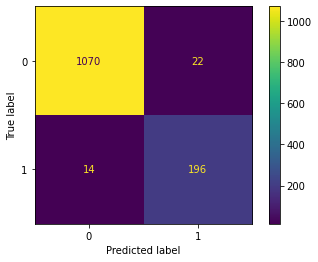

In [89]:
                          #CONFUSION MATRIX  MODELO AFINADO DTC
                          
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

#0 ACTIVOS
#1 RETIROS

predicted = modelfinal.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
display = ConfusionMatrixDisplay( confusion_matrix = matrix)
display.plot()
plt.show


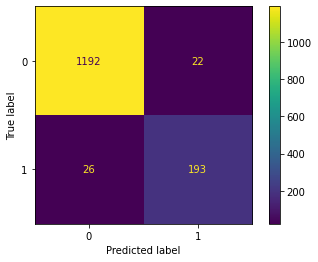

In [90]:
display1.plot()  #MATRIX CONFUSION MODELO DTC SIN OPTIMIZAR

EL ACCURACY DEL MODELO AFINADO NO MEJORÓ MUCHO RESPECTO AL MODELO NORMAL, PERO SI SE ANALIZA LA MATRIX CONFUSION SE NOTA QUE DISMINUYÓ LOS TIPOS DE ERRORES Y AUMENTO EL ACERTAMIENTO, QUE EN ESTE CASO EL DE INTERES SERÍA SI LA PERSONA VA RENUNCIAR (1), PASÓ DE 193 ACIERTOS POSITIVOS A 196.

In [91]:
                                #SOBREAJUSTE

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
eval=cross_validate(modelfinal,X,y,cv=5,scoring="accuracy",return_train_score=True)
train_rf=pd.DataFrame(eval['train_score'])
test_rf=pd.DataFrame(eval['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']
print(train_test_rf)

   train_score  test_score
0     0.997408    0.995392
1     0.997696    0.996544
2     0.997984    0.995392
3     0.997408    0.996544
4     0.997696    0.995392


DESPLIEGUE DEL MODELO

In [93]:
#Guardar el modelo en formato pkl
import joblib
joblib.dump(modelfinal, "modelfinal.pkl")

['modelfinal.pkl']

In [94]:
#Cargar el modelo
modelfinal = joblib.load("modelfinal.pkl")